# Performing a factor analysis for the grid parameters
https://www.datacamp.com/tutorial/introduction-factor-analysis
Find the parameters for clustering that make up independent factors in the grid parameter dataset.

The factor analysis:
* reduces the number of observed variables and search for influential underlying factors or latent variables.
* is a linear statistical model.
* is aimed to gain an insight into the grid parameters.

In [1]:
import warnings
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../../..")) # Determine the project's root directory
sys.path.append(PROJECT_ROOT) # Add the project root directory to Python's module search path.

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from classification.database_communication.DatabaseCommunication import DatabaseCommunication
from plotting.plotting_classification import plot_factor_analysis, get_parameters_for_clustering

warnings.filterwarnings('ignore')

get grid parameter dataset and make qualitative pre-selection of parameters

In [2]:
dc = DatabaseCommunication()
df = dc.get_clustering_parameters_for_classification_version()

Database connection is constructed. 


In [3]:
# Dropping unnecessary columns
df.drop(['version_id', 'plz', 'bcid', 'kcid', 'ratio', 'osm_trafo', 'house_distance_km', 'no_connection_buses',
         'resistance', 'reactance', 'simultaneous_peak_load_mw',
         'no_household_equ', 'max_power_mw'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   no_branches                       318 non-null    int64  
 1   no_house_connections              318 non-null    int64  
 2   no_house_connections_per_branch   318 non-null    float64
 3   no_households                     318 non-null    int64  
 4   no_households_per_branch          318 non-null    float64
 5   max_no_of_households_of_a_branch  318 non-null    float64
 6   transformer_mva                   318 non-null    float64
 7   max_trafo_dis                     318 non-null    float64
 8   avg_trafo_dis                     318 non-null    float64
 9   cable_length_km                   318 non-null    float64
 10  cable_len_per_house               318 non-null    float64
 11  vsw_per_branch                    318 non-null    float64
 12  max_vsw_

## Adequacy test
check 'factorability'
'Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis' [datacamp]

In [5]:
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(4418.098603012276, 0.0)

'In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.'[datacamp]

'Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.' [datacamp]

In [6]:
kmo_all, kmo_model = calculate_kmo(df)
kmo_model

0.7273853220050885

'The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed with your planned factor analysis.' [datacamp]

## Number of factors

In [7]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)
# Check Eigenvalues
ev = fa.get_eigenvalues()
ev[0]

array([4.62522568, 3.03370542, 2.38807264, 1.24833155, 0.63105271,
       0.32264383, 0.19001361, 0.1468711 , 0.12447951, 0.10357479,
       0.07386434, 0.06241865, 0.04974616])

get the eigenvalues larger than 1.
This is the appropriate number of factors

In [8]:
no_of_factors = (ev[0] > 1).sum()
no_of_factors

4

tutorial according to https://scikit-learn.org/stable/auto_examples/decomposition/plot_varimax_fa.html#sphx-glr-auto-examples-decomposition-plot-varimax-fa-py

## Principal Component Analysis, Factor Analysis


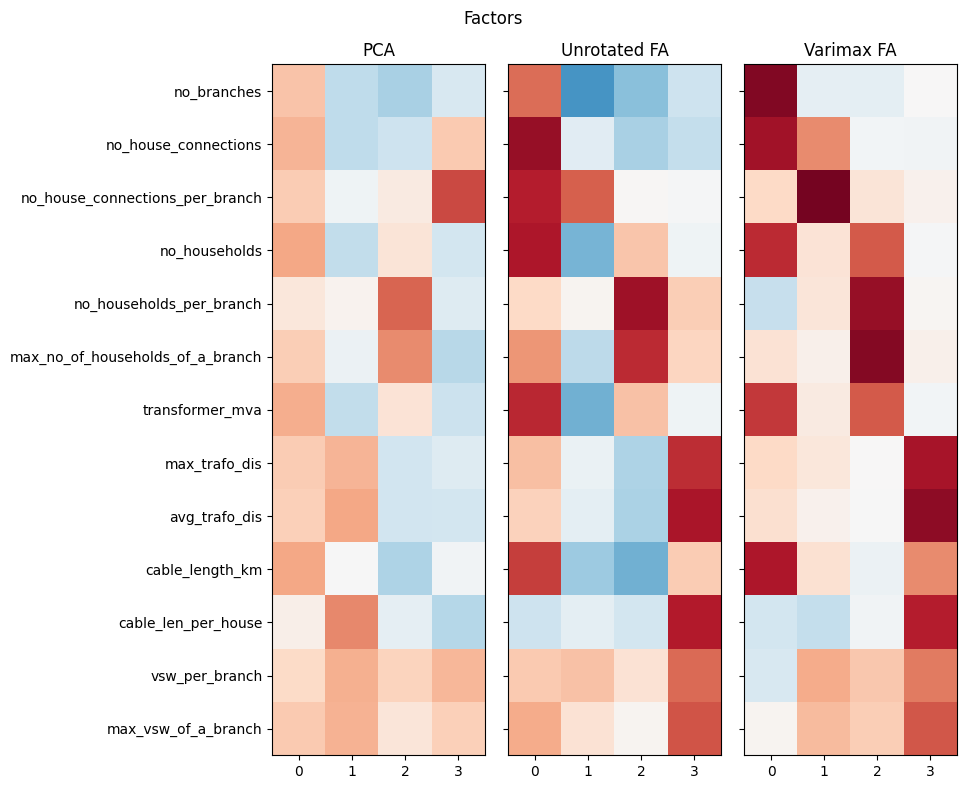

In [9]:
plot_factor_analysis(df_grid_parameters=df, n_comps=no_of_factors)

For each factor the parameter is choosen that has the highest factor load on that factor in the factor analysis with varimax rotation.
The proposed parameters for clustering thus are:

In [10]:
get_parameters_for_clustering(df_grid_parameters=df, n_comps=no_of_factors)

no_branches
no_house_connections_per_branch
max_no_of_households_of_a_branch
avg_trafo_dis
